Material for the book Probability and Statistics for Data Science. A free preprint, videos, code, slides and solutions to exercises are available at https://www.ps4ds.net/

Monte Carlo simulations to analyze the final set in the 2010 Isner–Mahut Wimbledon match, which lasted 138 games and over 8 hours, smashing all previous records.\
Topics and relevant videos: [Monte Carlo simulations](https://www.youtube.com/watch?v=vIY_J85hHdw), [confidence intervals](https://www.youtube.com/watch?v=dlGl2dGNZSI), [explaining the longest match in tennis history](https://youtu.be/EH_HJRo2Oec)

Author: Carlos Fernandez-Granda

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib
matplotlib.rcParams['text.usetex'] = True
from numpy.random import default_rng

font_size = 15
font_size_legend = 15
font_size_ticks = 15

In [4]:
# Code to simulate a single game, assuming that the serve point winning % (win_prob_serve) is known
def simulate_game(win_prob_serve,verbose):
    points_1 = 0
    points_2 = 0
    # The game ends when one player has 4 points or more, and they have at least 2 points more than the other player
    while (points_1 < 4 and points_2 < 4) or np.abs(points_1 - points_2) < 2:
        if rng.random() < win_prob_serve:
            points_1 += 1
        else:
            points_2 += 1
        if verbose:
            print(points_1,"-",points_2)
    if points_1 > points_2:
        # Player who serves wins
        outcome = 1
    else:
        # Player who receives wins
        outcome = 0
    return outcome

In [6]:
# Test
rng = default_rng(2025)
for ind in range(3):
    outcome = simulate_game(0.5,1)
    if outcome == 1:
        print("Serving player wins")
    else:
        print("Receiving player wins")

0 - 1
1 - 1
1 - 2
1 - 3
1 - 4
Receiving player wins
1 - 0
2 - 0
2 - 1
2 - 2
3 - 2
4 - 2
Serving player wins
1 - 0
2 - 0
3 - 0
3 - 1
4 - 1
Serving player wins


In [7]:
# Code to simulate a single set, assuming that the serve point winning % for both players 
# (win_prob_serve_1 and win_prob_serve_2) are known
def simulate_set(win_prob_serve_1,win_prob_serve_2,verbose_game,verbose,truncate = False,truncate_val = 0):
    games_1 = 0
    games_2 = 0
    # Each player starts serving with probability 1/2
    who_serves = 1
    if rng.random() < 0.5:
        who_serves = 2
    # The set ends when one player has 6 games or more, and they have at least 2 games more than the other player
    while (games_1 < 6 and games_2 < 6) or np.abs(games_1 - games_2) < 2:
        if truncate:
            if games_1 + games_2 > truncate_val:
                if verbose:
                    print("truncate_val exceeded")
                break
        if verbose:
            print("Player ", who_serves, "serves")
        if who_serves == 1: 
            if simulate_game(win_prob_serve_1,verbose_game) == 1:
                games_1 += 1
            else:
                games_2 += 1
            who_serves = 2
        else:
            if simulate_game(win_prob_serve_2,verbose_game) == 1:
                games_2 += 1
            else:
                games_1 += 1
            who_serves = 1
        if verbose:
            print(games_1,"-",games_2)
    outcome = [games_1,games_2]
    return outcome

In [10]:
# Test
simulate_set(0.7,0.7,1,1)

Player  2 serves
1 - 0
2 - 0
2 - 1
3 - 1
3 - 2
4 - 2
0 - 1
Player  1 serves
1 - 0
1 - 1
2 - 1
2 - 2
3 - 2
4 - 2
1 - 1
Player  2 serves
1 - 0
2 - 0
2 - 1
2 - 2
3 - 2
4 - 2
1 - 2
Player  1 serves
0 - 1
0 - 2
0 - 3
0 - 4
1 - 3
Player  2 serves
1 - 0
2 - 0
3 - 0
4 - 0
1 - 4
Player  1 serves
1 - 0
1 - 1
2 - 1
3 - 1
3 - 2
3 - 3
3 - 4
4 - 4
5 - 4
6 - 4
2 - 4
Player  2 serves
1 - 0
2 - 0
3 - 0
3 - 1
3 - 2
3 - 3
4 - 3
5 - 3
2 - 5
Player  1 serves
1 - 0
2 - 0
3 - 0
4 - 0
3 - 5
Player  2 serves
1 - 0
2 - 0
3 - 0
3 - 1
4 - 1
3 - 6


[3, 6]

In [11]:
# Test
for ind in range(3):
    outcome = simulate_set(0.75,0.75,0,0)
    print(outcome[0],"-",outcome[1])

7 - 5
25 - 23
6 - 2


In [12]:
# Source for statistics: https://web.archive.org/web/20101207111944/http://2010.wimbledon.org/en_GB/scores/stats/day11/1160ms.html
win_prob_serve_isner = 374 / 491
win_prob_serve_mahut = 385 / 489
print("Serve point win probability")
print("Isner", np.round(win_prob_serve_isner,3))
print("Mahut", np.round(win_prob_serve_mahut,3))

Serve point win probability
Isner 0.762
Mahut 0.787


In [13]:
# Simulating the last set in the match between Isner and Mahut, Wimbledon 2010
n_matches = int(1e6)
n_games_array = np.zeros(n_matches)
n_won_isner = 0

for ind in range(n_matches):
    outcome = simulate_set(win_prob_serve_isner,win_prob_serve_mahut,0,0)
    n_games_array[ind] = outcome[0] + outcome[1]
    if outcome[0] > outcome[1]:
        n_won_isner += 1

In [14]:
p_isner_wins = n_won_isner / n_matches
print("Probability that Isner wins: ", np.round(p_isner_wins,3))

Probability that Isner wins:  0.387


In [15]:
actual_n_games = 68 + 70
p_games = np.sum(n_games_array >= actual_n_games) / n_matches
print("Probability of",actual_n_games,"games or more: ", np.round(p_games,5))

Probability of 138 games or more:  0.00872


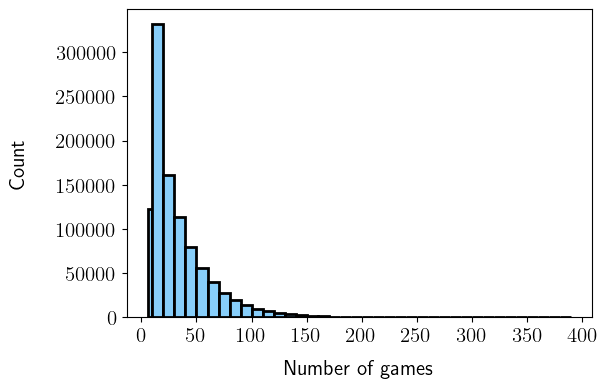

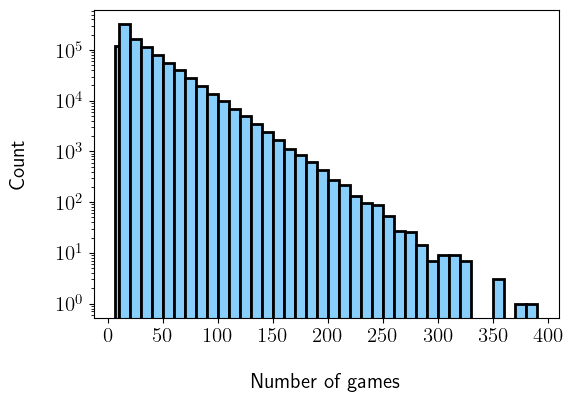

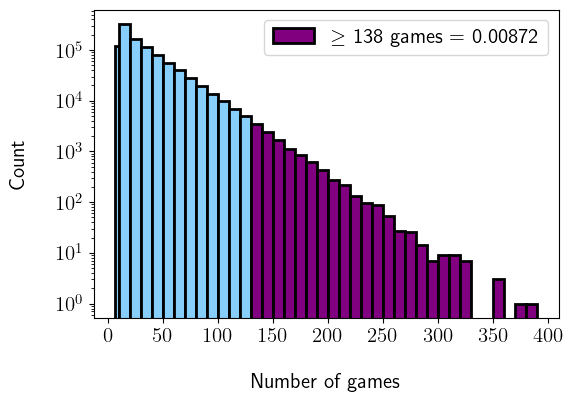

In [16]:
bins = np.arange(0, 400, 10) 
bins[0] = 6

plt.figure(figsize=(6,4))
plt.xticks(fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks)
plt.hist(n_games_array,bins=bins,
         color='lightskyblue', edgecolor='black',
          linewidth=2,density=False)
plt.xlabel("Number of games",fontsize=font_size,labelpad=10)
plt.ylabel("Count",fontsize=font_size,labelpad=20)

# Compute histogram manually
hist, bin_edges = np.histogram(n_games_array, bins=bins, density=False)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

plt.figure(figsize=(6, 4))
plt.xticks(fontsize=font_size_ticks)
plt.yticks(np.arange(0, 0.02, 0.005),fontsize=font_size_ticks)
# Logarithmic y-axis
plt.yscale('log')
# Plot each bar with color depending on whether it's left or right of actual_n_games
for i in range(len(hist)):
    left = bin_edges[i]
    right = bin_edges[i + 1]
    color = 'lightskyblue'
    plt.bar(left, hist[i], width=right - left, align='edge',
            color=color, edgecolor='black', linewidth=2)

plt.xlabel("Number of games", fontsize=font_size, labelpad=20)
plt.ylabel("Count", fontsize=font_size, labelpad=20)

plt.figure(figsize=(6, 4))
plt.xticks(fontsize=font_size_ticks)
plt.yticks(np.arange(0, 0.02, 0.005),fontsize=font_size_ticks)
plt.yscale('log')
# Plot each bar with color depending on whether it's left or right of t_data
for i in range(len(hist)):
    left = bin_edges[i]
    right = bin_edges[i + 1]
    color = 'lightskyblue' if right <= actual_n_games else 'purple'
    if i == len(hist)-1:
        plt.bar(left, hist[i], width=right - left, align='edge',
            color=color, edgecolor='black', linewidth=2,label="$\geq$ " + str(actual_n_games) + " games = "+str(np.round(p_games,5)))
    else:
        plt.bar(left, hist[i], width=right - left, align='edge',
            color=color, edgecolor='black', linewidth=2)

plt.xlabel("Number of games", fontsize=font_size, labelpad=20)
plt.ylabel("Count", fontsize=font_size, labelpad=20)
plt.legend(fontsize=font_size);

In [18]:
# We study the dependence between the number of games and the probability of win a serving game, 
# when both players have the same probability
n_matches = int(1e5)
win_prob_vals = np.arange(0.7,0.95,0.025)
n_vals = len(win_prob_vals)
p_games_array = np.zeros(n_vals)

truncate = True
truncate_val = actual_n_games

for ind_vals in range(n_vals):
    win_prob_serve = win_prob_vals[ind_vals]
    n_games_array_aux = np.zeros(n_matches)
    n_won_isner = 0
    
    for ind in range(n_matches):
        outcome = simulate_set(win_prob_serve,win_prob_serve,0,0,truncate,truncate_val)
        n_games_array_aux[ind] = outcome[0] + outcome[1]
        if outcome[0] > outcome[1]:
            n_won_isner += 1
    
    p_games_array[ind_vals] = np.sum(n_games_array_aux >= actual_n_games) / n_matches
    # print("Serve point win probability: ",np.round(win_prob_serve,3))
    # print("Probability of",actual_n_games,"games or more: ", np.round(p_games_array[ind_vals],5))

Serve point win probability:  0.7
Probability of 138 games or more:  1e-05
Serve point win probability:  0.725
Probability of 138 games or more:  5e-05
Serve point win probability:  0.75
Probability of 138 games or more:  0.00111
Serve point win probability:  0.775
Probability of 138 games or more:  0.0108
Serve point win probability:  0.8
Probability of 138 games or more:  0.05192
Serve point win probability:  0.825
Probability of 138 games or more:  0.17119
Serve point win probability:  0.85
Probability of 138 games or more:  0.38049
Serve point win probability:  0.875
Probability of 138 games or more:  0.62213
Serve point win probability:  0.9
Probability of 138 games or more:  0.8212
Serve point win probability:  0.925
Probability of 138 games or more:  0.93945


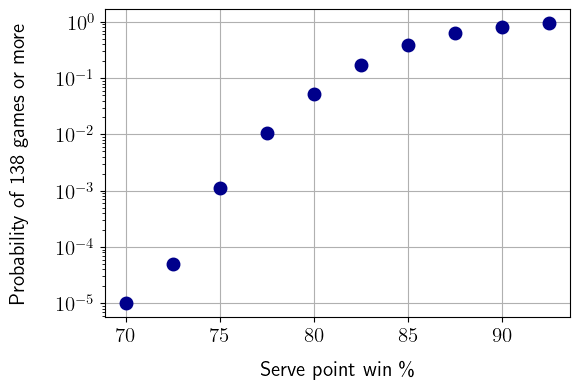

In [19]:
plt.figure(figsize=(6,4))
plt.semilogy(100*win_prob_vals,p_games_array, "o",markersize=8,markerfacecolor='darkblue',markeredgecolor="darkblue",
         markeredgewidth=2)
plt.grid()
plt.xticks(fontsize=font_size_ticks)
plt.xticks(fontsize=font_size_ticks)
plt.yticks(fontsize=font_size_ticks)
plt.ylabel("Probability of " + str(actual_n_games) + " games or more",fontsize=font_size,labelpad = 20)
plt.xlabel('Serve point win \%',labelpad =10,fontsize=font_size);

In [ ]:
# We study the dependence between the number of games and the probability of win a serving game, 
# when one player has a fixed probability
n_matches = int(1e5)
win_prob_serve_fixed_vals = [0.7, 0.75, 0.8]
n_vals_fixed = len(win_prob_serve_fixed_vals)
p_games_array_fixed = np.zeros((n_vals_fixed,n_vals))

truncate = True
truncate_val = actual_n_games

for ind_fixed in range(n_vals_fixed):
    win_prob_serve_fixed = win_prob_serve_fixed_vals[ind_fixed]
    for ind_vals in range(n_vals):
        win_prob_serve = win_prob_vals[ind_vals]
        n_games_array_aux = np.zeros(n_matches)
        n_won_isner = 0
        
        for ind in range(n_matches):
            outcome = simulate_set(win_prob_serve_fixed,win_prob_serve,0,0,truncate,truncate_val)
            n_games_array_aux[ind] = outcome[0] + outcome[1]
            if outcome[0] > outcome[1]:
                n_won_isner += 1
        
        p_games_array_fixed[ind_fixed][ind_vals] = np.sum(n_games_array_aux >= actual_n_games) / n_matches
        # print("Probabilities of win serving point: ",win_prob_serve_fixed,np.round(win_prob_serve,3))
        # print("Probability of",actual_n_games,"games or more: ", np.round(p_games_array_fixed[ind_fixed][ind_vals],5))

In [ ]:
plt.figure(figsize=(7,4))
plt.semilogy(100*win_prob_vals,p_games_array_fixed[0], "o",markersize=8,markerfacecolor='darkred',markeredgecolor="darkred",
         markeredgewidth=2,label=str(100*win_prob_serve_fixed_vals[0]))
plt.semilogy(100*win_prob_vals,p_games_array_fixed[1], "o",markersize=8,markerfacecolor='forestgreen',markeredgecolor="forestgreen",
         markeredgewidth=2,label=str(100*win_prob_serve_fixed_vals[1]))
plt.semilogy(100*win_prob_vals,p_games_array_fixed[2], "o",markersize=8,markerfacecolor='darkorchid',markeredgecolor="darkorchid",
         markeredgewidth=2,label=str(100*win_prob_serve_fixed_vals[2]))
plt.grid()
plt.ylim([1e-5,9])
plt.xticks(fontsize=font_size_ticks)
plt.xticks(fontsize=font_size_ticks)
plt.yticks(fontsize=font_size_ticks)
leg = plt.legend(title="Serve point win \%",fontsize=font_size_legend)
leg.get_title().set_fontsize(font_size_legend)
plt.ylabel("Probability of " + str(actual_n_games) + " games or more",fontsize=font_size,labelpad = 20)
plt.xlabel('Serve point win \% (Player 2)',labelpad =10,fontsize=font_size);

In [ ]:
# Probability of observing 138 games or more games exactly once out of 20 sets (number of sets between "servebot" players until 2010 
# not subject to tie-break according to ChatGPT) 
n_sets = 20
thetas = np.logspace(-5, 0, num=500)
prob = n_sets * thetas * ((1 - thetas)**(n_sets-1))
plt.figure(figsize=(7,3))
plt.semilogx(thetas,prob,lw=3,color='mediumblue')
plt.grid()
plt.xticks(fontsize=font_size_ticks)
plt.xticks(fontsize=font_size_ticks)
plt.yticks(fontsize=font_size_ticks)
plt.ylabel(r"Prob. of $\geq$" + str(actual_n_games) + " games\n once in " + str(n_sets) + " sets",fontsize=font_size,labelpad = 20)
plt.xlabel(r"Probability of $\geq$" + str(actual_n_games)+ " games in a set",labelpad =10,fontsize=font_size);